<a href="https://colab.research.google.com/github/aidanmwood/data-analysis/blob/main/Maine_Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Load Data

In [2]:
precip_raw = "https://raw.githubusercontent.com/aidanmwood/data-analysis/main/Precip_Monthly_Avg_PortlandME.csv"
temp_raw = "https://raw.githubusercontent.com/aidanmwood/data-analysis/main/Temp_Monthly_Avg_PortlandME.csv"

precip_df = pd.read_csv(precip_raw, index_col=0)
temp_df = pd.read_csv(temp_raw, index_col=0)

# Clean Data (remove -99 values)

In [3]:
precip_df.astype(float)
temp_df.astype(float)

precip_df.replace(-99.0, np.nan, inplace=True)
temp_df.replace(-99.0, np.nan, inplace=True)

# Plot Monthly Data

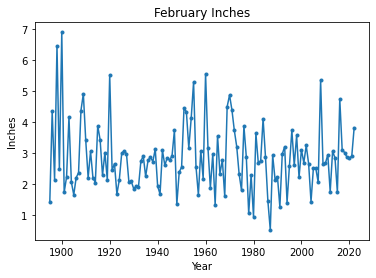

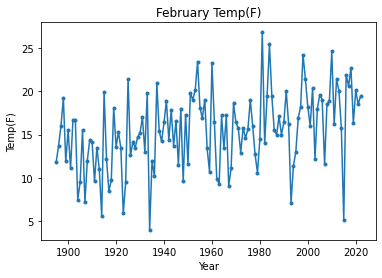

In [4]:
def plot_precip(month):
  plt.plot(precip_df.index, precip_df[month + ' Inches'], '.-')
  plt.xlabel('Year')
  plt.ylabel('Inches')
  plt.title(month + ' Inches')
  plt.show()
  
def plot_temp(month):
  plt.plot(temp_df.index, temp_df[month + ' Temp(F)'], '.-')
  plt.xlabel('Year')
  plt.ylabel('Temp(F)')
  plt.title(month + ' Temp(F)')
  plt.show()

plot_precip('February')
plot_temp('February')

#Analizing Raw Data

## Adding Columns for avg, min, max, std, median

In [5]:
temp_df['Avg Temp'] = temp_df.iloc[:,:].mean(axis=1)
temp_df['Max Temp'] = temp_df.iloc[:,:].max(axis=1)
temp_df['Min Temp'] = temp_df.iloc[:,:].min(axis=1)
temp_df['Median Temp'] = temp_df.iloc[:,:].median(axis=1)
temp_df['Standard Dev'] = temp_df.iloc[:,:].std(axis=1)

precip_df['Avg Precip'] = precip_df.iloc[:,:].mean(axis=1)
precip_df['Max Precip'] = precip_df.iloc[:,:].max(axis=1)
precip_df['Min Precip'] = precip_df.iloc[:,:].min(axis=1)
precip_df['Median Precip'] = precip_df.iloc[:,:].median(axis=1)
precip_df['Standard Dev'] = precip_df.iloc[:,:].std(axis=1)

precip_df

,January Inches,February Inches,March Inches,April Inches,May Inches,June Inches,July Inches,August Inches,September Inches,October Inches,November Inches,December Inches,Avg Precip,Max Precip,Min Precip,Median Precip,Standard Dev
Date,,,,,,,,,,,,,,,,,
1895,4.04,1.42,1.97,3.97,2.12,2.96,2.98,3.45,1.41,1.88,6.52,4.04,3.063333,6.52,1.41,2.980000,1.597272
1896,1.34,4.34,6.35,1.65,2.39,2.95,4.47,3.48,6.04,3.83,4.27,1.34,3.537500,6.35,1.34,3.537500,1.710940
1897,3.63,2.15,3.67,2.65,5.04,4.03,5.43,4.20,2.71,1.31,5.33,3.63,3.648333,5.43,1.31,3.648333,1.331739
1898,2.09,6.46,1.96,3.46,2.00,4.54,2.66,3.60,2.98,5.90,5.35,2.09,3.590833,6.46,1.96,3.460000,1.619553
1899,2.86,2.48,5.17,0.96,2.54,3.37,5.55,1.11,3.39,2.31,2.70,2.86,2.941667,5.55,0.96,2.860000,1.437569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,3.79,3.02,2.95,4.65,1.92,3.69,4.06,3.78,3.15,4.48,6.18,3.79,3.788333,6.18,1.92,3.788333,1.194693
2019,3.75,2.87,2.19,5.37,4.49,4.69,3.31,4.80,3.46,5.73,4.08,3.75,4.040833,5.73,2.19,4.040833,1.093475
2020,5.33,2.85,2.70,4.17,2.62,2.29,3.85,2.81,1.00,6.12,3.83,5.33,3.575000,6.12,1.00,3.575000,1.577122


## Calculating basic stats for months

In [6]:
temp_df.describe()

,January Temp(F),February Temp(F),March Temp(F),April Temp(F),May Temp(F),June Temp(F),July Temp(F),August Temp(F),September Temp(F),October Temp(F),November Temp(F),December Temp(F),Avg Temp,Max Temp,Min Temp,Median Temp,Standard Dev
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,127.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,13.574219,15.464844,25.950781,38.533594,50.726562,59.962500,65.483594,63.424219,55.346094,44.613281,32.625000,19.351969,40.437997,65.716406,11.992188,40.622319,19.115615
std,4.471066,4.426417,3.833873,2.425724,2.547609,2.016702,1.960788,2.265724,2.238985,2.529367,2.991168,4.753559,1.572698,1.879051,3.962653,1.676187,1.098919
min,3.800000,4.000000,17.000000,31.800000,43.500000,55.000000,60.700000,57.300000,51.100000,36.700000,24.300000,5.000000,36.516667,61.300000,3.800000,36.516667,16.478810
25%,10.550000,12.500000,23.400000,36.800000,49.075000,58.775000,64.275000,61.775000,53.650000,42.900000,30.675000,16.150000,39.356250,64.675000,9.475000,39.389583,18.422793
50%,13.700000,15.700000,25.650000,38.350000,51.000000,60.100000,65.350000,63.300000,55.500000,44.550000,32.450000,19.500000,40.429167,65.550000,12.200000,40.491667,19.214659
75%,16.450000,18.675000,28.825000,40.325000,52.325000,61.100000,66.800000,65.025000,56.500000,46.100000,34.700000,22.700000,41.172917,67.200000,14.200000,41.722917,19.891415
max,22.600000,26.800000,34.600000,44.900000,56.500000,65.200000,70.000000,68.800000,61.800000,52.000000,38.900000,31.200000,44.863636,70.000000,20.400000,47.031818,21.613183


# Analizing Max and Min Temps By Month

In [7]:
precipextremes_df = pd.DataFrame()
precipextremes_df['Max Precip'] = precip_df.iloc[:, 0:12].max()
precipextremes_df['Max Precip Year'] = precip_df.iloc[:, 0:12].idxmax()
precipextremes_df['Min Precip'] = precip_df.iloc[:, 0:12].min()
precipextremes_df['Min Precip Year'] = precip_df.iloc[:, 0:12].idxmin()

tempextremes_df = pd.DataFrame()
tempextremes_df['Max Temp'] = temp_df.iloc[:, 0:12].max()
tempextremes_df['Max Temp Year'] = temp_df.iloc[:, 0:12].idxmax()
tempextremes_df['Min Temp'] = temp_df.iloc[:, 0:12].min()
tempextremes_df['Min Temp Year'] = temp_df.iloc[:, 0:12].idxmin()

## Temperature Extremes

In [8]:
tempextremes_df

,Max Temp,Max Temp Year,Min Temp,Min Temp Year
January Temp(F),22.6,2006,3.8,1920
February Temp(F),26.8,1981,4.0,1934
March Temp(F),34.6,2010,17.0,1923
April Temp(F),44.9,2010,31.8,1926
May Temp(F),56.5,1911,43.5,1917
June Temp(F),65.2,1930,55.0,1958
July Temp(F),70.0,1921,60.7,1962
August Temp(F),68.8,1937,57.3,1903
September Temp(F),61.8,2015,51.1,1904
October Temp(F),52.0,2017,36.7,1925


##Precipitation Extremes

In [9]:
precipextremes_df

,Max Precip,Max Precip Year,Min Precip,Min Precip Year
January Inches,9.04,1973,1.17,1943
February Inches,6.89,1900,0.53,1987
March Inches,8.02,1902,0.46,1915
April Inches,7.36,1983,0.83,1966
May Inches,7.26,1984,0.71,1911
June Inches,9.36,1917,1.31,1913
July Inches,7.57,1996,1.27,1952
August Inches,8.17,1991,0.98,2002
September Inches,9.04,1999,1.00,2020
October Inches,11.26,2005,0.51,1947


#Plot Yearly Data with Moving Average 

## Temperature Data

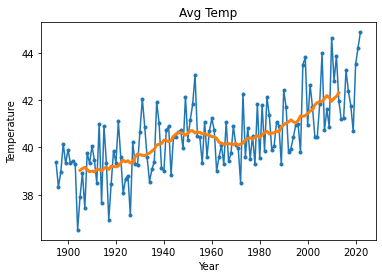

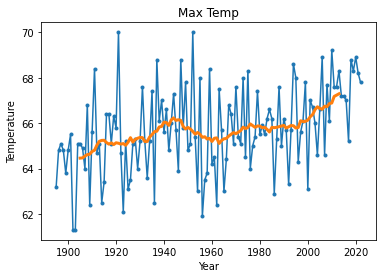

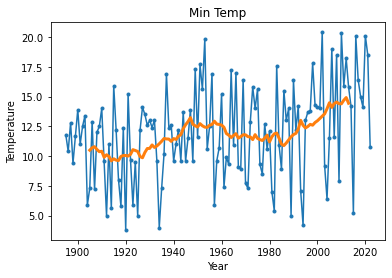

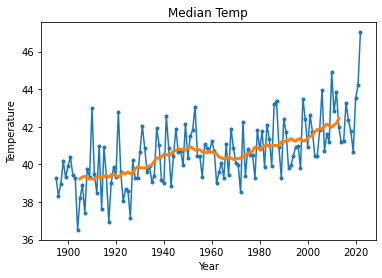

In [10]:
for col in temp_df.columns[12:16]:
  plt.plot(temp_df[col], '.-')
  plt.plot(temp_df[col].rolling(20, center=True).mean(), '-', linewidth=3)
  plt.title(col)
  plt.xlabel('Year')
  plt.ylabel('Temperature')
  plt.show()

## Precipitation Data

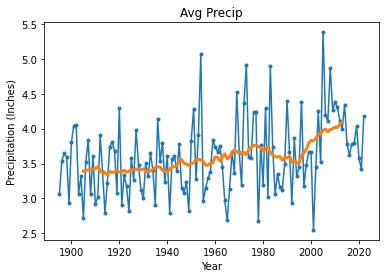

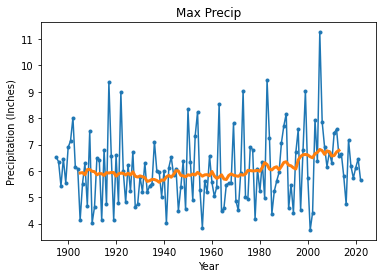

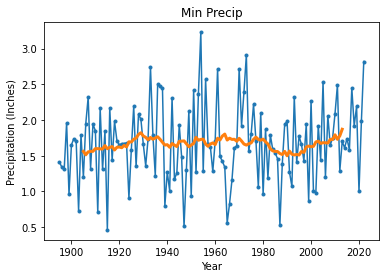

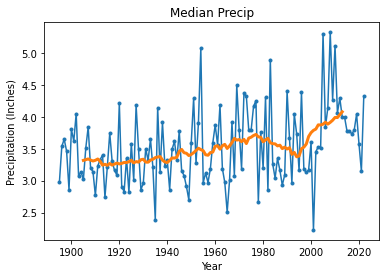

In [11]:
for col in precip_df.columns[12:16]:
  plt.plot(precip_df.index, precip_df[col], '.-')
  plt.plot(precip_df.index, precip_df[col].rolling(20, center=True).mean(), '-', linewidth=3)
  plt.title(col)
  plt.xlabel('Year')
  plt.ylabel('Precipitation (Inches)')
  plt.show()

# Plot Monthly Data with Moving Average

## Temperature

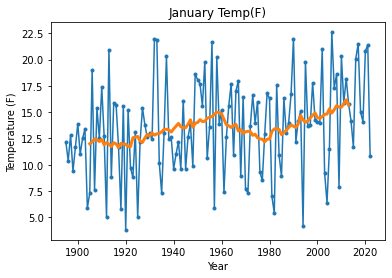

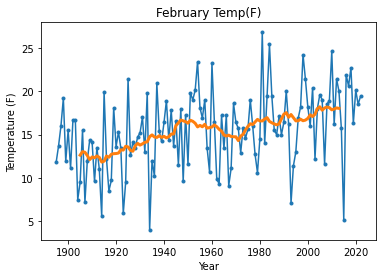

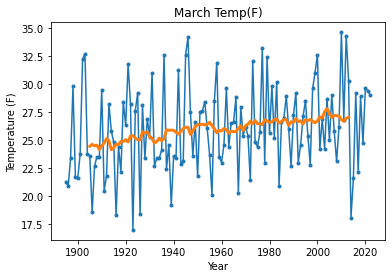

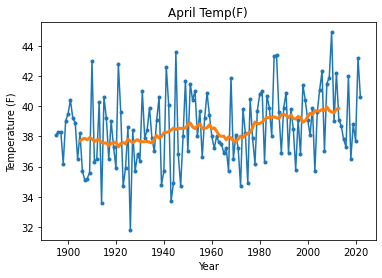

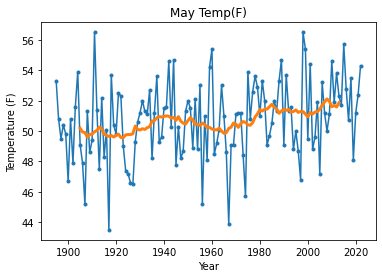

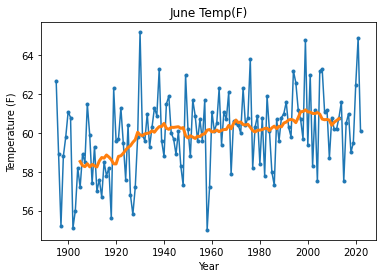

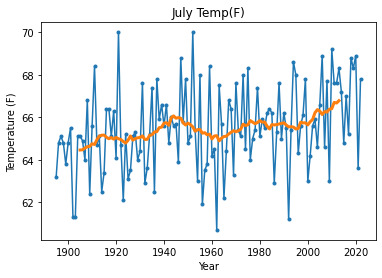

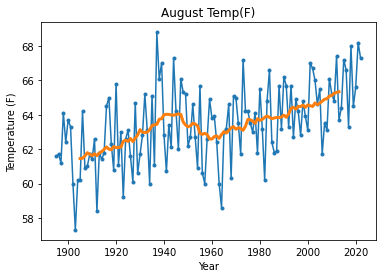

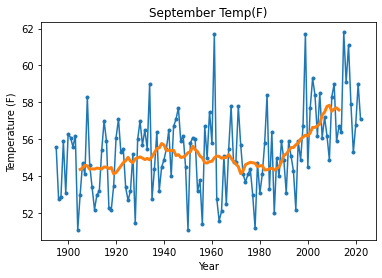

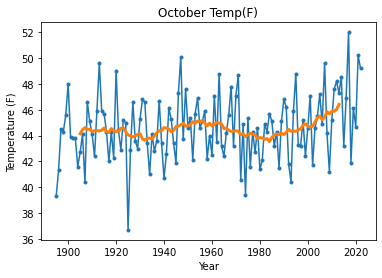

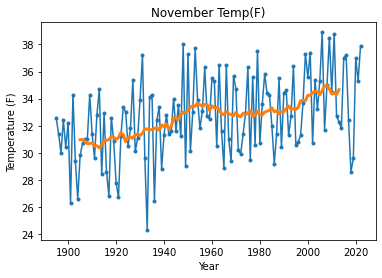

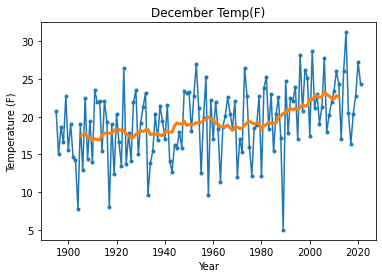

In [12]:
for month in tempextremes_df.index:
  # if tempextremes_df.loc[month, 'Max Temp Year'] >= 2000 or tempextremes_df.loc[month, 'Min Temp Year'] >= 2000:
    plt.plot(temp_df[month], '.-')
    plt.plot(temp_df[month].rolling(20, center=True).mean(), '-', linewidth=3)
    plt.title(month)
    plt.xlabel('Year')
    plt.ylabel('Temperature (F)')
    plt.show()

##Precipitation

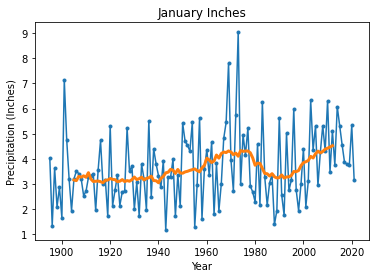

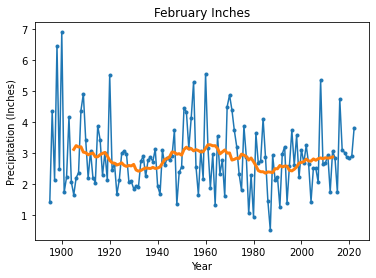

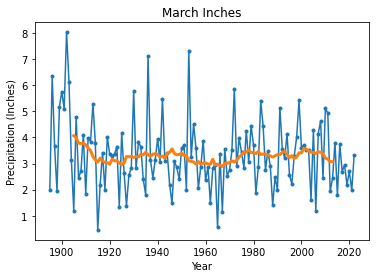

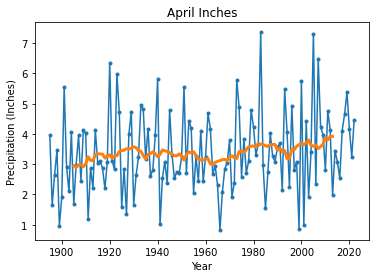

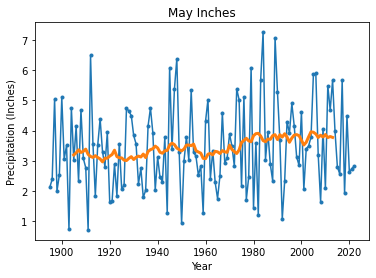

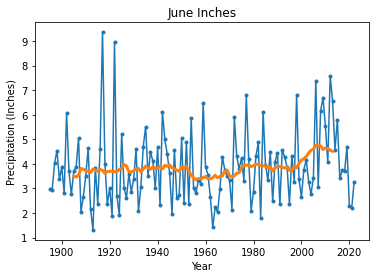

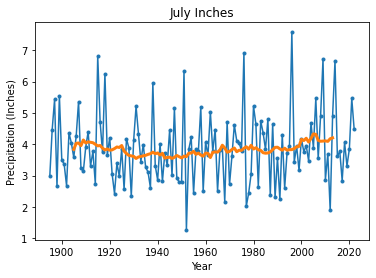

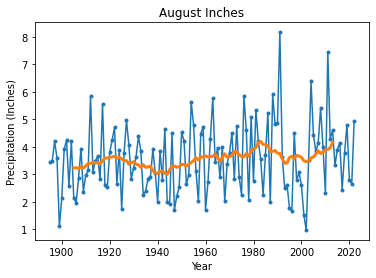

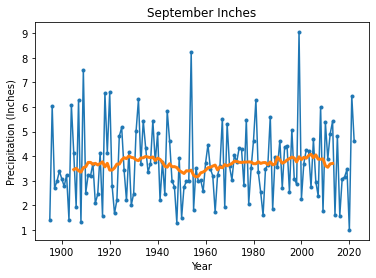

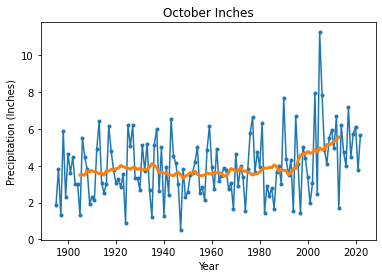

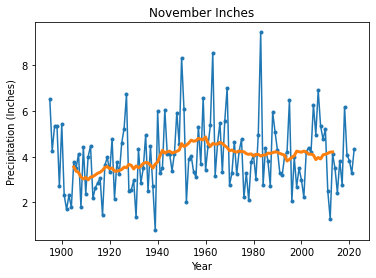

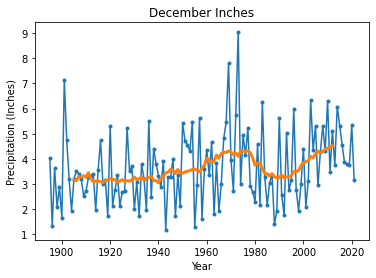

In [13]:
for month in precipextremes_df.index:
    plt.plot(precip_df[month], '.-')
    plt.plot(precip_df[month].rolling(20, center=True).mean(), '-', linewidth=3)
    plt.title(month)
    plt.xlabel('Year')
    plt.ylabel('Precipitation (Inches)')
    plt.show()

#Predicting Future Trends

##Isolating Temperature Moving Average from 1980-2022

In [14]:
temp_rolling = pd.DataFrame(temp_df['Avg Temp'].rolling(20, center=True).mean())

recent_temp = temp_rolling.loc[1980:2013]

recent_temp

,Avg Temp
Date,
1980,40.415833
1981,40.531250
1982,40.617083
1983,40.682500
1984,40.567500
1985,40.608750
1986,40.614167
1987,40.686667
1988,40.652917


##Isolating Precipitation Moving Average from 1980-2022

In [15]:
precip_rolling = pd.DataFrame(precip_df['Avg Precip'].rolling(20, center=True).mean())

recent_precip = precip_rolling.loc[1980:2013]

recent_precip

,Avg Precip
Date,
1980,3.677625
1981,3.713833
1982,3.737625
1983,3.666250
1984,3.613792
1985,3.600250
1986,3.593625
1987,3.600750
1988,3.547833


##Finding Least Squares Coefficients

In [16]:
# Matrix Inverse
def mat_inv(A, ifit):
  if (type(A) == 'list'):
    A = np.array(A)
  
  return np.linalg.inv(A)

# Uses matrix multiplication for Least Squares Coefficients
def get_coeffs(A, B, ifit):
  ls_coefs = np.matmul(A, B)

  return ls_coefs

# Gets Least Squares Coefficients based on vals from mat_inv and get_coeffs
def ls_coeffs(x,y):
  x2 = []
  y2 = []
  xy = []

  for i in x:
    i2 = i*i
    x2.append(i2)

  for i in y:
    i2 = i*i
    y2.append(i2)

  for (i, j) in zip(x, y):
    ij = i*j
    xy.append(ij)

  matrix = [[sum(x2), sum(x)], [sum(x), len(x)]]

  inv_matrix = mat_inv(matrix, 1)

  return get_coeffs(inv_matrix, [[sum(xy)], [sum(y)]], 1)

In [17]:
precip_coeffs = ls_coeffs(recent_precip.index, recent_precip['Avg Precip'])

print(precip_coeffs)

[[ 1.55791597e-02]
 [-2.73444947e+01]]


In [18]:
temp_coeffs = ls_coeffs(recent_temp.index, recent_temp['Avg Temp'])

print(temp_coeffs)

[[ 5.81744334e-02]
 [-7.48315598e+01]]


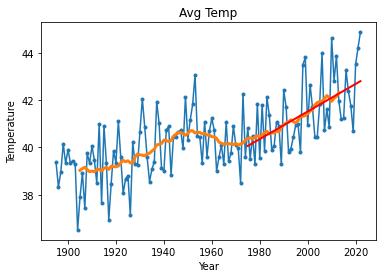

In [19]:
plt.plot(temp_df['Avg Temp'], '.-')
plt.plot(temp_df['Avg Temp'].rolling(20, center=True).mean(), '-', linewidth=3)
plt.plot([1975, 2022], [temp_coeffs[0]*1975+temp_coeffs[1], temp_coeffs[0]*2022+temp_coeffs[1]], 'r-', linewidth=2)
plt.title('Avg Temp')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

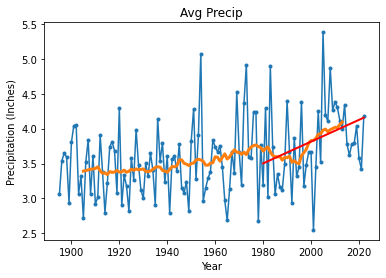

In [20]:
plt.plot(precip_df.index, precip_df['Avg Precip'], '.-')
plt.plot(precip_df.index, precip_df['Avg Precip'].rolling(20, center=True).mean(), '-', linewidth=3)
plt.plot([1980, 2022], [precip_coeffs[0]*1980+precip_coeffs[1], precip_coeffs[0]*2022+precip_coeffs[1]], 'r-', linewidth=2)
plt.title('Avg Precip')
plt.xlabel('Year')
plt.ylabel('Precipitation (Inches)')
plt.show()

In [21]:
print(f'2025 estimate: {(temp_coeffs[0]*2025+temp_coeffs[1]) - recent_temp.loc[2013]}')
print(f'2030 estimate: {(temp_coeffs[0]*2030+temp_coeffs[1]) - recent_temp.loc[2013]}')
print(f'2035 estimate: {(temp_coeffs[0]*2035+temp_coeffs[1]) - recent_temp.loc[2013]}')
print(f'2050 estimate: {(temp_coeffs[0]*2050+temp_coeffs[1]) - recent_temp.loc[2013]}')


2025 estimate: Avg Temp    0.660569
Name: 2013, dtype: float64
2030 estimate: Avg Temp    0.951442
Name: 2013, dtype: float64
2035 estimate: Avg Temp    1.242314
Name: 2013, dtype: float64
2050 estimate: Avg Temp    2.11493
Name: 2013, dtype: float64
